### The Sparks Foundation GRIP July 2021

# Task 2: Prediction using Unsupervised ML
#### By: Lekshmi Pillai

### Objective: Predict the percentage of an student based on the no. of study hours.

Dataset url: http://bit.ly/w-data

##### Importing Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Loading the Dataset

In [57]:
data = pd.read_csv("Study.csv")
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#####  Exploring and Understanding the Dataset

In [58]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [60]:
data.shape

(25, 2)

There are 25 rows and 2 columns in the dataset.

In [61]:
data.isnull().sum() # checking for null values

Hours     0
Scores    0
dtype: int64

Since there are no null values in our data, we can start visualization

#### Data Visualization

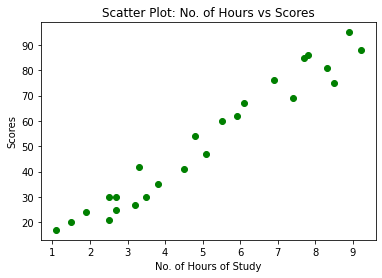

In [62]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
plt.plot(x,y,"go")
plt.title("Scatter Plot: No. of Hours vs Scores")
plt.xlabel("No. of Hours of Study")
plt.ylabel("Scores")
plt.show()

There is positive correlation between No of hours of Study and Scores

<AxesSubplot:>

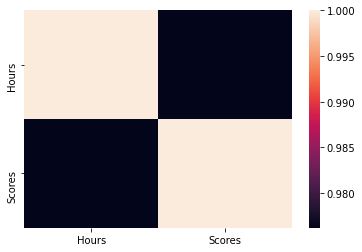

In [63]:
sns.heatmap(data.corr())

##### Splitting the Data into Test set and Train set

In [64]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print("Size of training set: ",len(x_train))
print("Size of test set: ",len(x_test))

Size of training set:  20
Size of test set:  5


Thus our data has been split into:
    80% Training Data and
    20% Test Data

##### Training the Data

In [65]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print("Training is completed.")

Training is completed.


##### Plotting the Regression Line

In [66]:
reg_coef = lr.coef_
print("Slope/Regression coefficient of the model is: ", reg_coef[0])
reg_const = lr.intercept_
print("Intercept/Regression constant of the model is: ", reg_const)



Slope/Regression coefficient of the model is:  9.910656480642237
Intercept/Regression constant of the model is:  2.018160041434683


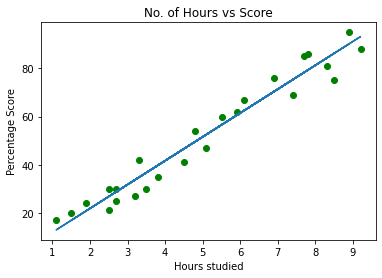

In [67]:
line = reg_coef*x + reg_const
plt.scatter(x,y,color='green')
plt.plot(x,line)
plt.title("No. of Hours vs Score")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")
plt.show()

In [68]:
print("Training Score: ", lr.score(x_train,y_train))

Training Score:  0.9515510725211552


A training score of 0.9515 indicated that out model is 95.15% accurate to predict.

#### Making Predictions


In [69]:
y_pred = lr.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

#### Comparing Actual & Predicted Data

In [70]:
data_diff = pd.DataFrame({"Actual": y_test,"Predicted": y_pred, "Difference?Error": y_test - y_pred})
data_diff

,Actual,Predicted,Difference?Error
5,20,16.884145,3.115855
2,27,33.732261,-6.732261
19,69,75.357018,-6.357018
16,30,26.794801,3.205199
11,62,60.491033,1.508967


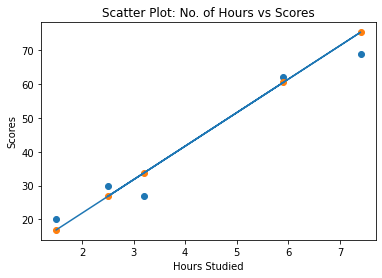

In [71]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred)
plt.plot(x_test,y_pred)
plt.title("Scatter Plot: No. of Hours vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.show()

### Suppose a student studies 9.25 hours a day, then what would be his predicted score?

In [72]:
hours = [[9.25]]
pred_score = lr.predict(hours)
print("Score predicted for 9.25 hours a day: ", pred_score[0])

Score predicted for 9.25 hours a day:  93.69173248737538


### Thus, the predicted score is calculated with the help of linear regression and if found to be 93.69